# **Assignment#01**

# Air Quality Analysis: Regression Model and KDE Plot

## Importing Libraries

In this cell, we import the necessary libraries for data manipulation, visualization, and machine learning. This includes `pandas`, `numpy`, `matplotlib`, `seaborn`, and `scikit-learn`.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Loading the Dataset

Here, we load the air quality dataset from an Excel file. We display the first few rows to understand its structure and contents.

In [36]:
airquality = pd.read_excel('C:/Users/TEST/OneDrive - Higher Education Commission/Desktop/Air_Quality_Analysis/Dataset/AirQualityUCI.xlsx')

In [37]:
airquality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


## Preprocessing the Dataset

In this section, we check for missing values represented as `-200`. We replace these values with `NaN` and then impute missing values using the mean of each numeric column. We also check again for any remaining `-200` values after preprocessing.

In [38]:
# Check for missing values (represented as -200)
print("\nChecking for -200 values (missing data):")
for col in airquality.columns:
    if isinstance(airquality[col].min(), (int, float)) and airquality[col].min() == -200:
        print(f"{col} has -200 values: {(airquality[col] == -200).sum()} ({(airquality[col] == -200).sum()/len(airquality)*100:.2f}%)")


Checking for -200 values (missing data):
CO(GT) has -200 values: 1683 (17.99%)
PT08.S1(CO) has -200 values: 366 (3.91%)
C6H6(GT) has -200 values: 366 (3.91%)
PT08.S2(NMHC) has -200 values: 366 (3.91%)
NOx(GT) has -200 values: 1639 (17.52%)
PT08.S3(NOx) has -200 values: 366 (3.91%)
NO2(GT) has -200 values: 1642 (17.55%)
PT08.S4(NO2) has -200 values: 366 (3.91%)
PT08.S5(O3) has -200 values: 366 (3.91%)
T has -200 values: 366 (3.91%)
RH has -200 values: 366 (3.91%)
AH has -200 values: 366 (3.91%)


In [39]:
# Replace -200 with NaN
df_clean = airquality.copy()
for col in df_clean.columns:
    if df_clean[col].dtype != 'datetime64[ns]' and df_clean[col].dtype != 'object':
        df_clean[col] = df_clean[col].replace(-200, np.nan)

In [40]:
# Impute missing values (example: mean imputation for numeric columns)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].mean())

In [41]:
# Check for missing values (represented as -200)
print("\nChecking for -200 values (missing data):")
for col in df_clean.columns:
    if isinstance(df_clean[col].min(), (int, float)) and df_clean[col].min() == -200:
        print(f"{col} has -200 values: {(df_clean[col] == -200).sum()} ({(df_clean[col] == -200).sum()/len(df_clean)*100:.2f}%)")


Checking for -200 values (missing data):


## Defining Features and Target Variable

We define the target variable, `CO(GT)`, and prepare the feature set for regression analysis. The feature set consists of all numeric columns except the target variable.

In [42]:
# Let's assume 'CO(GT)' is the target variable for regression analysis
target_variable = 'CO(GT)'
features = df_clean.drop(columns=[target_variable]).select_dtypes(include=[np.number]).dropna(axis=1)

## Splitting the Dataset

In this cell, we split the dataset into training and testing sets using `train_test_split()`. This allows us to evaluate the model's performance on unseen data.

In [43]:
# Split the Dataset
X = features
y = df_clean[target_variable].dropna()
X = X.loc[y.index]  # Align X with y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Regression Model

Here, we train a linear regression model using the training data. We then make predictions on the test set.

In [44]:
# Train a Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Generating the KDE Plot

In this section, we create a Kernel Density Estimate (KDE) plot to visualize the distribution of actual versus predicted values for the target variable. This plot helps us assess the model's performance visually.

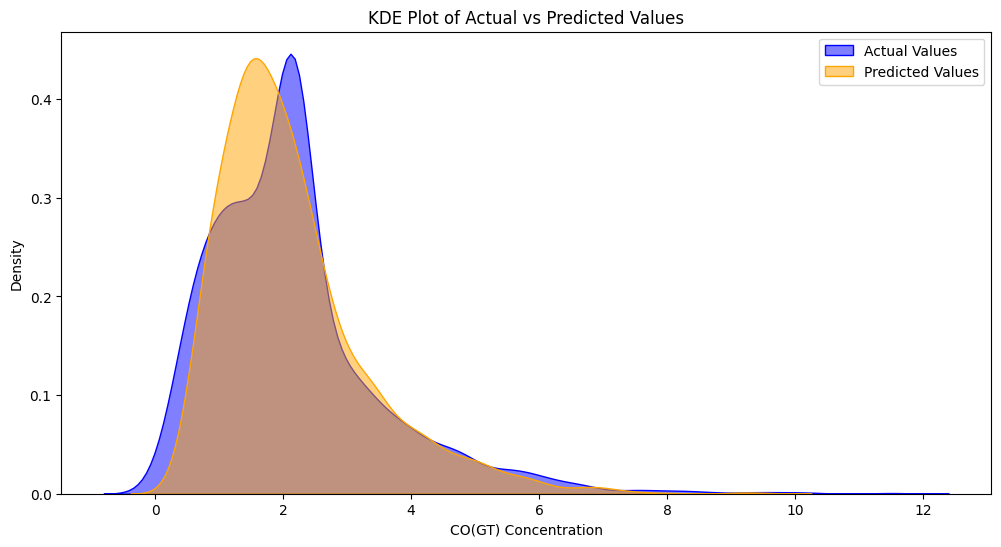

In [45]:
# Generate KDE Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(y_test, fill=True, label='Actual Values', color='blue', alpha=0.5)
sns.kdeplot(y_pred, fill=True, label='Predicted Values', color='orange', alpha=0.5)
plt.title('KDE Plot of Actual vs Predicted Values')
plt.xlabel('CO(GT) Concentration')
plt.ylabel('Density')
plt.legend()
plt.savefig('kde_plot.png')
plt.show()

## Step 5: Evaluate Model Performance

In this section, we evaluate the performance of the trained linear regression model using two key metrics: Mean Squared Error (MSE) and R-squared (R²). 

- **Mean Squared Error (MSE)** measures the average squared difference between the actual and predicted values. A lower MSE indicates better model performance.
- **R-squared (R²)** indicates the proportion of variance in the dependent variable that can be explained by the independent variables. R² values range from 0 to 1, with higher values indicating a better fit.

We will print these metrics to assess how well our model predicts the target variable, `CO(GT)`.

In [46]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared:.2f}")

Mean Squared Error (MSE): 0.33
R-squared: 0.82
